### Doğukan Güven
### Konu: Bir marketler zincirine ait, ülkelere göre ürün satış verilerinin; görselleştirimesi, ön işlemesi, veri analizi ve birliktelik analizlerinin yapılması. 

In [1]:
import pandas as pd

# 1-Veri setinin ortama aktarılması

In [2]:
dataFrame = pd.read_excel('data.xlsx')
dataFrame

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 2-Tanımlayıcı Veri Analizi

## Veri setindeki kayıt sayısı

In [3]:
dataFrame.shape[0]

541909

## Veri setindeki nitelik sayısı

In [4]:
dataFrame.shape[1]

8

## Veri setindeki nitelikler

In [5]:
dataFrame.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Veri setindeki nitelik tipleri ve nitelik değeri null olmayan örnek sayıları 

In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Satılan ürünler hakkında bilgiler

### Satılan ürünlerin çeşitleri hakkında veriler

In [7]:
products = dataFrame['Description'].unique()

#### Satılan ürün çeşidi sayısı

In [8]:
products.size

4224

#### Satılan ürün çeşitleri

In [9]:
products

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

##### Veri setinde 'lost' gibi istenmeyen özellikler bulunmakta bunlar veri ön işleme kısmında kaldırılacaktır.

#### Ürün başına satış sayısı

In [10]:
dataFrame['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

##### En çok satılan ürünün 'WHITE HANGING HEART T-LIGHT HOLDER' ürünü olduğu gözükmektedir.

### Ürünlerin satıldığı ülkeler hakkında bilgiler

In [11]:
Country = dataFrame['Country'].unique()

#### Satış yapılan ülkelerin sayısı

In [12]:
Country.size

38

#### Satış yapılan ülkeler

In [13]:
Country.sort()
Country

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

#### Ülkelere göre satılan ürün miktarları

In [14]:
Ulkelere_gore_urun_miktar = dataFrame.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)
Ulkelere_gore_urun_miktar

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


##### En çok ürün satılan ülkenin Birleşik Krallık olduğu gözükmektedir. Ezici bir üstünlüğü bulunmaktadır.

### Müşteriler hakkında bilgiler

In [15]:
Customers = dataFrame['CustomerID'].unique()

#### Müşteri başına alışveriş sayısı

In [16]:
Musteri_alisverisleri = dataFrame.groupby(['CustomerID'])['InvoiceNo'].count().sort_values(ascending=False)
Musteri_alisverisleri

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14119.0       1
13747.0       1
15590.0       1
15562.0       1
17925.0       1
Name: InvoiceNo, Length: 4372, dtype: int64

##### En çok alışveriş yapan müşterinin 17841 ID li müşteri olduğu gözükmektedir.

#### Alışveriş yapmış müşteri sayısı

In [17]:
Customers.size

4373

##### 4373 farklı müşteri alışveriş yapmıştır.

## Sayısal niteliklerin Merkezi Eğilim ve Dağılım ölçüleri

In [18]:
des = dataFrame.describe().T
des

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Sayısal niteliklerin boş olmayan örnek sayısı

In [19]:
des['count']

Quantity      541909.0
UnitPrice     541909.0
CustomerID    406829.0
Name: count, dtype: float64

### Sayısal niteliklerin ortalamaları

In [20]:
des['mean']

Quantity          9.552250
UnitPrice         4.611114
CustomerID    15287.690570
Name: mean, dtype: float64

### Sayısal verilerin standard sapmaları

In [21]:
des['std']

Quantity       218.081158
UnitPrice       96.759853
CustomerID    1713.600303
Name: std, dtype: float64

### Sayısal verilerin tepe değerleri (Mod)

In [22]:
dataFrame.mode(numeric_only=True)

,Quantity,UnitPrice,CustomerID
0,1,1.25,17841.0


### Sayısal verilerin 5 sayı özetleri

#### Sayısal verilerin 1. çeyrekliği

In [23]:
des['25%']

Quantity          1.00
UnitPrice         1.25
CustomerID    13953.00
Name: 25%, dtype: float64

#### Sayısal verilerin Medyanı (2. çeyrekliği)

In [24]:
des['50%']

Quantity          3.00
UnitPrice         2.08
CustomerID    15152.00
Name: 50%, dtype: float64

#### Sayısal verilerin 3. çeyrekliği

In [25]:
des['75%']

Quantity         10.00
UnitPrice         4.13
CustomerID    16791.00
Name: 75%, dtype: float64

#### Sayısal verilerin minimum değerleri

In [26]:
des['min']

Quantity     -80995.00
UnitPrice    -11062.06
CustomerID    12346.00
Name: min, dtype: float64

#### Sayısal verilerin maximum değerleri

In [27]:
des['max']

Quantity      80995.0
UnitPrice     38970.0
CustomerID    18287.0
Name: max, dtype: float64

### Sayısal verilerin alt ve üst sınır değerleri

In [28]:

for i in range(des.shape[0]):
    print(des.iloc[i].name)
    q1 = des['25%'][i]
    q2 = des['50%'][i]
    q3 = des['75%'][i]
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    print("Verilerinin alt sınır degeri: " + str(lower_bound))
    print("Verilerinin üst sınır değeri: " + str(upper_bound))
    print("\n")

Quantity
Verilerinin alt sınır degeri: -12.5
Verilerinin üst sınır değeri: 23.5


UnitPrice
Verilerinin alt sınır degeri: -3.0700000000000003
Verilerinin üst sınır değeri: 8.45


CustomerID
Verilerinin alt sınır degeri: 9696.0
Verilerinin üst sınır değeri: 21048.0




### Sayısal verilerin varyansları

In [29]:
dataFrame.var(numeric_only=True)

Quantity      4.755939e+04
UnitPrice     9.362469e+03
CustomerID    2.936426e+06
dtype: float64

### Sayısal verilerin kovaryansları

In [30]:
dataFrame.cov()

,Quantity,UnitPrice,CustomerID
Quantity,47559.391409,-26.058761,-1.534050e+03
UnitPrice,-26.058761,9362.469164,-5.415793e+02
CustomerID,-1534.050176,-541.579276,2.936426e+06


##### Kovaryans matrisi; miktar ile birim fiyatı arasında negatif bir ilişki bulunduğunu göstermektedir.

 ### Sayısal verilerin korelasyonları

In [31]:
dataFrame.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


#### Korelasyon matrisi; miktar ile birim fiyatı arasındaki negatif ilişkiyi ve bu negatif ilişkinin zayıf olduğunu göstermektedir.

# 3-Verinin Görselleştirilerek Ayrıntılı Analizinin Yapılması

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Ürünlerin Wordcloud ile görselleştirilmesi

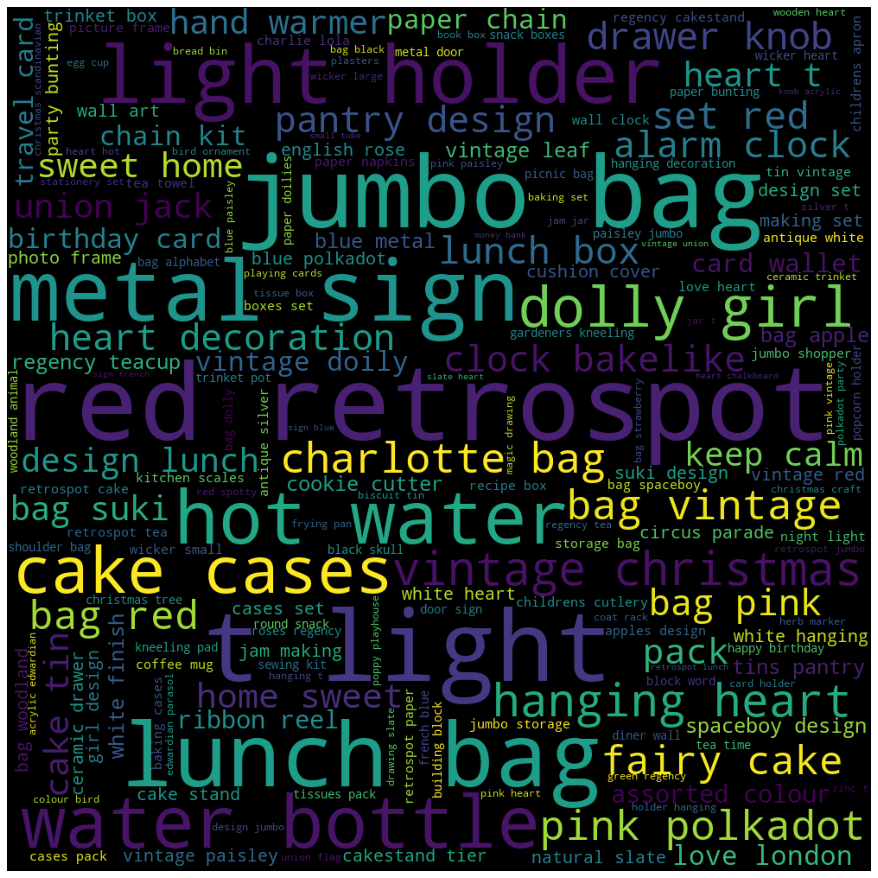

In [33]:
Metin = '' 
for i in dataFrame.columns:                         # Verisetinin niteliklerini gezinen döngü.
    Kelimeler = i.split()                           # Nitelikleri kelimelerine ayıran komut.
    for j in range(len(Kelimeler)):                 # Herbir kelimeyi gezinen döngü.
        Metin += Kelimeler[j].lower()               # Büyük harf içerern kelimeleri küçük harflere çeviren komut.
        Metin += ' '

for i in dataFrame['Description']:
    if type(i) != str:
        continue
    Kelimeler = i.split()                           # Nitelikleri kelimelerine ayıran komut.
    for j in range(len(Kelimeler)):                 # Herbir kelimeyi gezinen döngü.
        Metin += Kelimeler[j].lower()               # Büyük harf içerern kelimeleri küçük harflere çeviren komut.
        Metin += ' '

wordcloud = WordCloud(width = 1000, height = 1000,  # Wordcloud u oluşturan komut
                background_color ='black',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(Metin)
                        
plt.figure(figsize = (12, 12))                      # Wordcloud u ekrana yazdırmak için grafik çizimi yapan komutlar.
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Ürün satış miktarlarının ülkelere göre dağılımının pasta grafiği ile gösterilmesi.

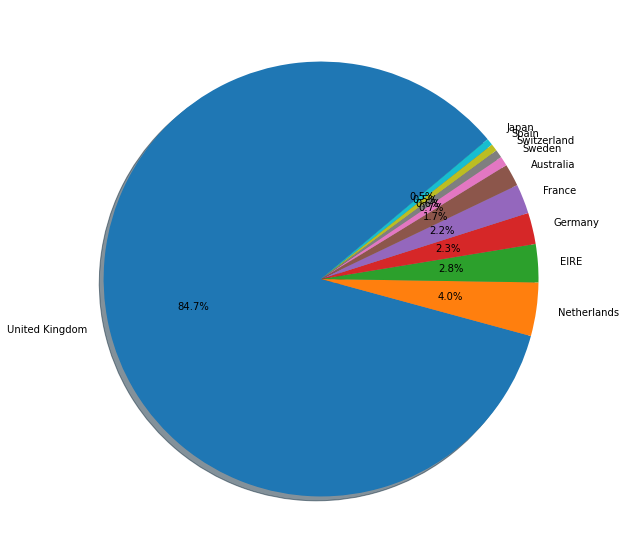

In [34]:
plt.figure(figsize=(10, 10))
plt.pie(Ulkelere_gore_urun_miktar[:10], startangle=40, autopct='%1.1f%%', shadow=True, labels=Ulkelere_gore_urun_miktar[:10].index)
plt.show()

#### Bu grafikte ürün alışverişinin büyük çoğunluğunun Birleşik krallıkta olduğu görülmektedir. Diğer Ülkelerin dağılımını daha iyi görmek için Birleşik Krallığı çıkartırsak;

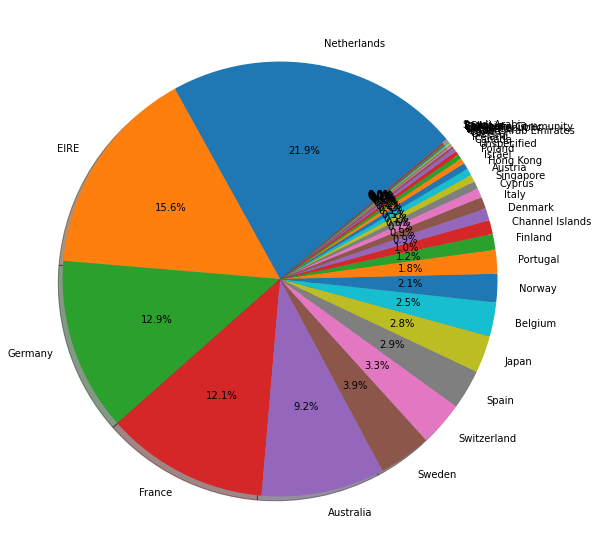

In [35]:
plt.figure(figsize=(10, 10))
plt.pie(Ulkelere_gore_urun_miktar[1:], startangle=40, autopct='%1.1f%%', shadow=True, labels=Ulkelere_gore_urun_miktar[1:].index)
plt.show()

## Ülkelere göre alışveriş miktarlarının barplot ile gösterimi.

Index(['Australia', 'Belgium', 'EIRE', 'France', 'Germany', 'Netherlands',
       'Portugal', 'Spain', 'Switzerland', 'United Kingdom'],
      dtype='object', name='Country')


<AxesSubplot:xlabel='InvoiceNo', ylabel='InvoiceNo'>

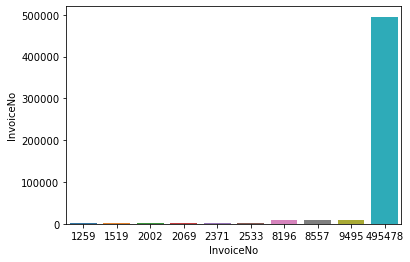

In [36]:
Ulkelere_gore_alisveris = dataFrame.groupby(['Country']).count()
Ulkelere_gore_alisveris = Ulkelere_gore_alisveris['InvoiceNo'].sort_values(ascending=False)
print(Ulkelere_gore_alisveris.index[:10].sort_values())
sns.barplot(x=Ulkelere_gore_alisveris.index[:10].sort_values(), y=Ulkelere_gore_alisveris[:10], data=Ulkelere_gore_alisveris[:10])


## En çok satılan ürünlerin barplot ile gösterimi

StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           80995
23166      MEDIUM CERAMIC TOP STORAGE JAR        78033
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
85099B     JUMBO BAG RED RETROSPOT               48478
85123A     WHITE HANGING HEART T-LIGHT HOLDER    37603
                                                 ...  
85160a     WHITE BIRD GARDEN DESIGN MUG              1
85170A     SET/6 IVORY BIRD T-LIGHT CANDLES          1
21160      KEEP OUT GIRLS DOOR HANGER                1
84510e     SET OF 4 GREEN CAROUSEL COASTERS          1
m          Manual                                    1
Name: Quantity, Length: 4319, dtype: int64


<AxesSubplot:xlabel='Quantity', ylabel='Quantity'>

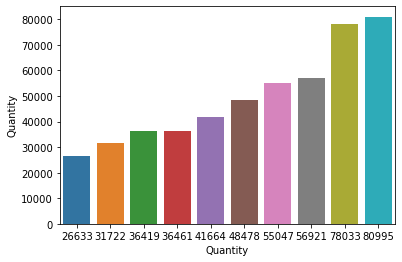

In [37]:
df = dataFrame[dataFrame.Quantity >= 0].groupby(['StockCode'])['Quantity'].sum().sort_values(ascending=False)
df_ = dataFrame[dataFrame.Quantity >= 0].groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)
print(df_)
sns.barplot(x=df[:10].index, y=df[:10], data=df[:100])


##### Grafiğe göre 'Paper Craft, Little birdie' ürünü en çok satılan ürün olarak gözükmektedir. Bu durum veri setindeki yanlış kayıtlardan kaynaklanmaktadır. Aslında en yüksek satış değerine sahip olan ürün 'MEDIUM CERAMIC TOP STORAGE JAR' ürünüdür. Bu gibi problemlerin önüne geçmek için ilerleyen adımlarda veri ön işleme yapılacaktır.

## Veri setinin pair plotta gösterimi.

##### Veri seti ön işlemeye tabii tutulamadığı için grafik oluşturulamıyor. Bu nedenle pairplot veri ön işleme adımından sonra gösterilecektir.

## Unit Price niteliğinin box plotta gösterimi.

<AxesSubplot:xlabel='UnitPrice'>

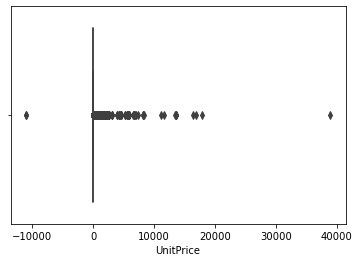

In [38]:
sns.boxplot(x=dataFrame['UnitPrice'])

##### Bu nitelikte sapmalar gözükmektedir ve veri ön işleme adımında giderileceklerdir.

## Quantity niteliğinin box plotta gösterimi.

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 541909, dtype: int64


<AxesSubplot:xlabel='Quantity'>

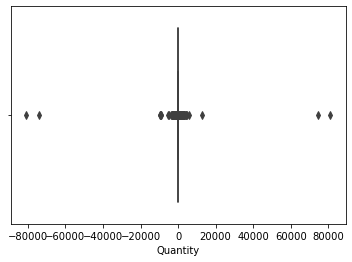

In [39]:
tmp_df = dataFrame['Quantity'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Bu nitelikte sapmalar gözükmektedir ve veri ön işleme adımında giderileceklerdir.

# 4-Veri seti üzerinde veri ön-işleme çalışması yapılması

## Veri setinde ürünlerin bulunduğu 'Description' niteliğinin ürünler haricindeki kayıtlarının temizlenmesi.

In [40]:
dataFrame = dataFrame[dataFrame['Description'].str.isupper().astype('bool')]
dataFrame

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


##### Ürünlerin isimleri tamamen büyük harfle yazılmıştır. Ayırt edici özellik olarak bu kullanılmıştır.

In [41]:
dataFrame['InvoiceNo'] = dataFrame['InvoiceNo'].astype('str')
dataFrame = dataFrame[~dataFrame['InvoiceNo'].str.contains('C')]
dataFrame['InvoiceNo'] = dataFrame['InvoiceNo'].astype('int')
dataFrame



C:\Users\Dogukan\AppData\Local\Temp\ipykernel_4448\3470311857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['InvoiceNo'] = dataFrame['InvoiceNo'].astype('str')
C:\Users\Dogukan\AppData\Local\Temp\ipykernel_4448\3470311857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['InvoiceNo'] = dataFrame['InvoiceNo'].astype('int')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Null verilerin kontrolü.

In [42]:
dataFrame.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133656
Country             0
dtype: int64

## Null olmayan verilerin kontrolü.

In [43]:
dataFrame.notnull().sum()

InvoiceNo      529918
StockCode      529918
Description    528464
Quantity       529918
InvoiceDate    529918
UnitPrice      529918
CustomerID     396262
Country        529918
dtype: int64

## Null verilerin yüzdelik değerleri.

In [44]:
dataFrame.isnull().sum() / dataFrame.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.274382
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.222015
Country         0.000000
dtype: float64

## CustomerID niteliğindeki null alanların doldurulması.

In [45]:
dataFrame['CustomerID'].fillna(dataFrame['CustomerID'].mode()[0], inplace=True)

C:\Users\Dogukan\AppData\Local\Temp\ipykernel_4448\74702269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['CustomerID'].fillna(dataFrame['CustomerID'].mode()[0], inplace=True)


#### CustomerID kategorik bir değişken olduğu için kategorik veriler için boş alan doldurma yöntemi kullanılmıştır.

## Description niteliğindeki null alanların doldurulması.

In [46]:
dataFrame['Description'].fillna(dataFrame['Description'].mode()[0], inplace=True)

C:\Users\Dogukan\AppData\Local\Temp\ipykernel_4448\3561496609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['Description'].fillna(dataFrame['Description'].mode()[0], inplace=True)


#### Description kategorik bir değişken olduğu için kategorik veriler için boş alan doldurma yöntemi kullanılmıştır.

## Null alan kalıp kalmadığının kontrolü

In [47]:
dataFrame.isnull().sum() / dataFrame.shape[0] * 100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

## Örneklerin kopyasının bulunup bulanmadığının kontrolü

In [48]:
dataFrame[dataFrame.duplicated(['InvoiceNo', 'StockCode', 'CustomerID'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


## Kopyası bulunan alanların kopyalarının silinmesi

In [49]:
dataFrame.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'CustomerID'], inplace=True)
dataFrame

C:\Users\Dogukan\AppData\Local\Temp\ipykernel_4448\2272117609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'CustomerID'], inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Aykırı Veri Tespiti

### Quantity niteliği için aykırı veri tespiti.

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 519432, dtype: int64


<AxesSubplot:xlabel='Quantity'>

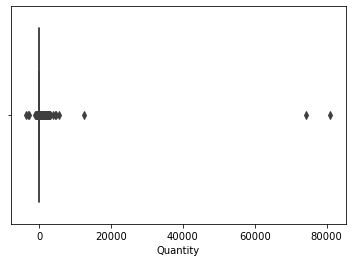

In [50]:
tmp_df = dataFrame['Quantity'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Boxplotta görüldüğü üzere aykırı veriler bulunmakta bunları temizleyelim;

In [51]:

#tmp_df = df
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))

Alt Sınır Değeri : -15.5
Üst Sınır Değeri : 28.5
1. Çeyrek : 1.0
2. Çeyrek : 4.0
3. Çeyrek : 12.0


##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 492186, dtype: int64


<AxesSubplot:xlabel='Quantity'>

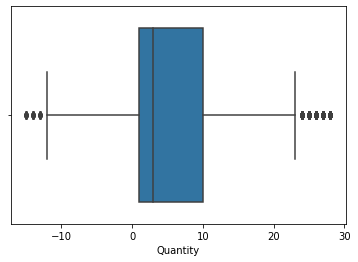

In [52]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
print(clean)
sns.boxplot(x=clean)

##### Quantity niteliği için aykırı veriler temizlenmiş oldu. Temizlenmiş verileri dataFrame e ekleyelim.

In [53]:
dataFrame['Quantity'] = clean
dataFrame.isnull().sum()

C:\Users\Dogukan\AppData\Local\Temp\ipykernel_4448\2377080059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['Quantity'] = clean


InvoiceNo          0
StockCode          0
Description        0
Quantity       27246
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
dtype: int64

##### Aykırı verilerin temizlenmesi sonucunda null değerler oluştu bunlar sonraki adımlarda tekrar giderilecek.

### Unit Price niteliği için aykırı veri tespiti.

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 519432, dtype: float64


<AxesSubplot:xlabel='UnitPrice'>

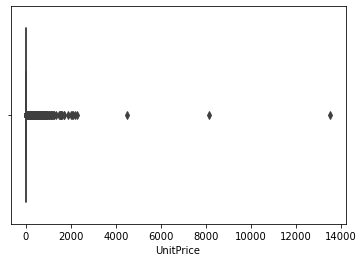

In [54]:
tmp_df = dataFrame['UnitPrice'].copy()
print(tmp_df)
sns.boxplot(x=tmp_df)

##### Boxplotta görüldüğü üzere aykırı veriler bulunmakta bunları temizleyelim;

In [55]:
Q1 = tmp_df.quantile(0.25)
Q2 = tmp_df.quantile(0.5)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1    

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 
outliers = (tmp_df < (lower_bound)) | (tmp_df > (upper_bound))
outliers

Alt Sınır Değeri : -3.0700000000000003
Üst Sınır Değeri : 8.45
1. Çeyrek : 1.25
2. Çeyrek : 2.08
3. Çeyrek : 4.13


0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: UnitPrice, Length: 519432, dtype: bool

##### Alt sınır ve üst sınır değerleri hesaplanarak bu sınırlara uymayan veriler tespit edildi. Temiz veriler clean değişkenine aktararak boxplotu tekrar çizdirelim.

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 481992, dtype: float64


C:\Users\Dogukan\AppData\Local\Temp\ipykernel_4448\1930689202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['UnitPrice'] = clean


<AxesSubplot:xlabel='UnitPrice'>

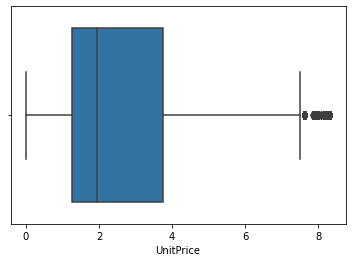

In [56]:
clean = tmp_df[~((tmp_df<(lower_bound)) | (tmp_df > (upper_bound)))]
dataFrame['UnitPrice'] = clean
print(clean)
sns.boxplot(x=clean)

##### Unit Price niteliği için aykırı veriler temizlenmiş oldu.

## Sampling

In [57]:
sample_data = dataFrame.sample(100000, random_state=61, axis=0).sort_index()
sample_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,2010-12-01 08:34:00,2.10,13047.0,United Kingdom
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,2010-12-01 08:34:00,3.75,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6.0,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10.0,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12.0,2011-12-09 12:50:00,1.65,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4.0,2011-12-09 12:50:00,3.75,12680.0,France


##### KNN ve Apriori algoritmalarının hızlı hesap yapabilmesi için veri setini temsil edebilecek 100 bin veri örnekledik.

## Örneklenen veri içerisindeki null alanların kontrolü.

In [58]:
sample_data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity       5211
InvoiceDate       0
UnitPrice      7189
CustomerID        0
Country           0
dtype: int64

##### Aykırı verilerin temizlenmesinin ardından null alanlar oluştu. Bunları KNN imputation algoritmasıyla dolduralım.

## KNN Algoritması ile Imputation

In [59]:
import numpy as np
from sklearn.impute import KNNImputer

### KNN algoritmasının hesap yapabilmesi için veri setimizdeki örnekleri içerisine yükledik.


In [60]:
imputer = KNNImputer(missing_values=np.nan,n_neighbors=5,  weights='uniform')
for_knn_table = sample_data.loc[:, ['Quantity', 'UnitPrice', 'CustomerID']]
imputer.fit(for_knn_table)

KNNImputer()

### KNN algoritması ile transform işlemi başlattık. Bu sayede boşluklar dolduruldu.

In [61]:
tmp = imputer.transform(for_knn_table)
tmp

array([[6.0000e+00, 3.3900e+00, 1.7850e+04],
       [6.0000e+00, 1.8500e+00, 1.7850e+04],
       [6.0000e+00, 2.1000e+00, 1.3047e+04],
       ...,
       [1.2000e+01, 1.6500e+00, 1.2680e+04],
       [4.0000e+00, 3.7500e+00, 1.2680e+04],
       [1.2000e+01, 8.5000e-01, 1.2680e+04]])

### Yeniden doldurulan nitelikler yenilenmiş bir indexe sahip olduğu için örneklenmiş verimizinde indexlerini yenileyelim. Aksi durumda eşleşmeyen indexler için null değerler oluşacak.

In [62]:
sample_data = sample_data.reset_index()

### KNN transformdan çıkan sonuçları bir dataframe e çevirdik.

In [63]:
tmp_new = pd.DataFrame(tmp, columns=['Quantity', 'UnitPrice', 'CustomerID'])
tmp_new


,Quantity,UnitPrice,CustomerID
0,6.0,3.39,17850.0
1,6.0,1.85,17850.0
2,6.0,2.10,13047.0
3,8.0,3.75,13047.0
4,6.0,4.25,13047.0
...,...,...,...
99995,12.0,1.95,15804.0
99996,10.0,7.08,13113.0
99997,12.0,1.65,12680.0
99998,4.0,3.75,12680.0


### Sonuçları içeren dataframe'i, örneklenen dataframe e ekleyelim.

In [64]:
sample_data['Quantity'] = tmp_new['Quantity'].copy()
sample_data['UnitPrice'] = tmp_new['UnitPrice'].copy()
sample_data['CustomerID'] = tmp_new['CustomerID'].copy()
sample_data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
2,11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,2010-12-01 08:34:00,2.10,13047.0,United Kingdom
3,12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,2010-12-01 08:34:00,3.75,13047.0,United Kingdom
4,21,536368,22960,JAM MAKING SET WITH JARS,6.0,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
99995,541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
99996,541893,581586,20685,DOORMAT RED RETROSPOT,10.0,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
99997,541896,581587,22555,PLASTERS IN TIN STRONGMAN,12.0,2011-12-09 12:50:00,1.65,12680.0,France
99998,541898,581587,22727,ALARM CLOCK BAKELIKE RED,4.0,2011-12-09 12:50:00,3.75,12680.0,France


### Null değer kontrolü yapalım.

In [65]:
sample_data.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##### KNN imputation algoritması sayesinde boş alanlar doldurulmuş oldu.

## Veri Düzleştirme

### Düzleştirme işlemi uygulanabilecek numerik verilere bakalım.

In [66]:
dataFrame.dtypes

InvoiceNo               int32
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### Quantity niteliğine düzleştirme uygulamak için niteliğin tanımlayıcısına bakalım.

In [67]:
dataFrame.Quantity.describe()

count    492186.000000
mean          5.909215
std           6.325469
min         -15.000000
25%           1.000000
50%           3.000000
75%          10.000000
max          28.000000
Name: Quantity, dtype: float64

### Düzleştirme uygulayabilmek için niteliği dataframe den çekelim.

In [68]:
X = sample_data.Quantity.values.reshape(-1, 1)
X

array([[ 6.],
       [ 6.],
       [ 6.],
       ...,
       [12.],
       [ 4.],
       [12.]])

### KBinDiscretizer algoritması ile veriyi düzleştirelim.

In [69]:
from sklearn.preprocessing import KBinsDiscretizer

#### Kural tanımını yapalım.

In [70]:
Kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

#### Dataframe den çektiğimiz niteliği kBin e yükleyelim.

In [71]:
Kbin.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

#### Niteliğin örneklerini düzleştirilmiş forma çevirelim.

In [72]:
trans_X = Kbin.transform(X).T[0]
print(trans_X)
print("Uzunluk: " + str(len(trans_X)))

[1. 1. 1. ... 1. 1. 1.]
Uzunluk: 100000


## Veri Dönüşümü

In [73]:
from sklearn import preprocessing

## Normalizasyon

In [74]:
x = sample_data['UnitPrice'].values.reshape(-1, 1)
minmax = preprocessing.MinMaxScaler(feature_range=(0, 10))
sample_data['UnitPrice_Scale'] = minmax.fit_transform(x).T[0]

## Scale

In [75]:
sample_data['Quantity_Scale'] = preprocessing.scale(sample_data.Quantity)

In [76]:
sample_data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_Scale,Quantity_Scale
0,1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.069628,-0.019430
1,7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2.220888,-0.019430
2,11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2.521008,-0.019430
3,12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,4.501801,0.294585
4,21,536368,22960,JAM MAKING SET WITH JARS,6.0,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,5.102041,-0.019430
...,...,...,...,...,...,...,...,...,...,...,...
99995,541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2.340936,0.922614
99996,541893,581586,20685,DOORMAT RED RETROSPOT,10.0,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,8.499400,0.608600
99997,541896,581587,22555,PLASTERS IN TIN STRONGMAN,12.0,2011-12-09 12:50:00,1.65,12680.0,France,1.980792,0.922614
99998,541898,581587,22727,ALARM CLOCK BAKELIKE RED,4.0,2011-12-09 12:50:00,3.75,12680.0,France,4.501801,-0.333444


## Label Encoder - One Hot Encoder

### Label encoder ve One hot encoder ile kategorik veri olan ülke isimlerini boolean türünde ayrı niteliklere ayıralım.

In [77]:
targets = sample_data.Country.values
OHE = preprocessing.OneHotEncoder()
OHE.fit(targets.reshape(-1, 1))
targets_trans = OHE.transform(targets.reshape(-1, 1))
print("Orijinal data: \n")
print(targets)
print("\nTransform data: \n")
print(targets_trans.toarray())

Orijinal data: 

['United Kingdom' 'United Kingdom' 'United Kingdom' ... 'France' 'France'
 'France']

Transform data: 

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [78]:
target_trans_dataframe = pd.DataFrame(targets_trans.toarray(), columns=Country)
target_trans_dataframe

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
pd.concat([sample_data, target_trans_dataframe],axis=1)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_Scale,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.069628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2.220888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2.521008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,4.501801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,21,536368,22960,JAM MAKING SET WITH JARS,6.0,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,5.102041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2.340936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,541893,581586,20685,DOORMAT RED RETROSPOT,10.0,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,8.499400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,541896,581587,22555,PLASTERS IN TIN STRONGMAN,12.0,2011-12-09 12:50:00,1.65,12680.0,France,1.980792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,541898,581587,22727,ALARM CLOCK BAKELIKE RED,4.0,2011-12-09 12:50:00,3.75,12680.0,France,4.501801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Korelasyon Tabanlı Özellik Seçimi

#### Korelasyon tabanlı özellik seçimini yapabilmek için korelasyon değerlerini hesaplayalım.

In [80]:
cor = sample_data.corr()
cor

,index,InvoiceNo,Quantity,UnitPrice,CustomerID,UnitPrice_Scale,Quantity_Scale
index,1.000000,0.998913,0.015112,-0.037258,-0.053790,-0.037258,0.015112
InvoiceNo,0.998913,1.000000,0.017901,-0.038221,-0.056041,-0.038221,0.017901
Quantity,0.015112,0.017901,1.000000,-0.363171,-0.295768,-0.363171,1.000000
UnitPrice,-0.037258,-0.038221,-0.363171,1.000000,0.093321,1.000000,-0.363171
CustomerID,-0.053790,-0.056041,-0.295768,0.093321,1.000000,0.093321,-0.295768
UnitPrice_Scale,-0.037258,-0.038221,-0.363171,1.000000,0.093321,1.000000,-0.363171
Quantity_Scale,0.015112,0.017901,1.000000,-0.363171,-0.295768,-0.363171,1.000000


##### Tabloda farklı nitelikler arasında zayıf ilişkiler bulunmakta. Bunlardan biri olan Unit Price ve Quantitiy arasında negatif yönde zayıf bir ilişki bulunmakta. daha net görebilmek için Unit price için değerleri getirelim.

In [81]:
Cor_target = abs(cor['UnitPrice'])
Cor_target

index              0.037258
InvoiceNo          0.038221
Quantity           0.363171
UnitPrice          1.000000
CustomerID         0.093321
UnitPrice_Scale    1.000000
Quantity_Scale     0.363171
Name: UnitPrice, dtype: float64

## Ön işleme adımından sonra gösterilecek olan Pairplot.

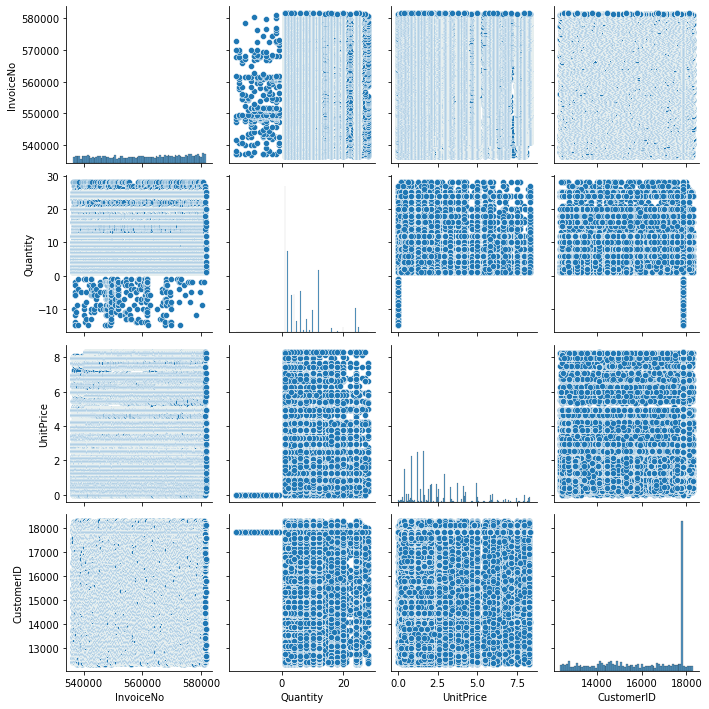

In [82]:
sns.pairplot(dataFrame)

# 5-Veri setinin birliktelik kuralları analizinin yapılması

## Ülke Seçimi: Ülke olarak İtalya seçilmiştir.

## Description niteliğindeki örnekleri gruplayalım.

In [94]:
sepet_italy = (dataFrame[dataFrame['Country'] =="italy"]
          .groupby(['InvoiceNo'])['Description'].apply(list).to_frame())

sepet_italy

,Description
InvoiceNo,
537022,"[t-light glass fluted antique, scented velvet ..."
539752,"[cake stand white two tier lace, regency cakes..."
541115,"[set of 3 heart cookie cutters, coffee mug cat..."
541703,"[lunch bag cars blue, lunch bag woodland, fair..."
542238,"[tea time des tea cosy, felt egg cosy white ra..."
544399,"[toy tidy pink polkadot, set of 20 kids cookie..."
545664,"[home building block word, first aid tin, brea..."
546875,"[home building block word, bath building block..."
547914,"[retrospot tea set ceramic 11 pc , plasters in..."


## Gruplamanın ardından dataframe yapısının içinden Description niteliğinde bulunan örnekleri listeye atayalım. Bu listeye çevirme işlemi apirori algoritmasının hesap yapabilmesi için gereklidir.

In [95]:
urun_list = sepet_italy.Description.to_list()

urun_list

[['t-light glass fluted antique',
  'scented velvet lounge candle ',
  'blue flock glass candleholder',
  'silver glitter flower votive holder',
  '6 chocolate love heart t-lights',
  'set of 6 t-lights santa',
  'set of 6 t-lights snowmen',
  'porcelain t-light holders assorted',
  'gold mug bone china tree of life',
  'scandinavian 3 hearts napkin ring',
  'rose scent candle in jewelled box',
  'rose scent candle jewelled drawer',
  'set/3 vanilla scented candle in box',
  '3 gardenia morris boxed candles',
  'rose 3 wick morris box candle',
  'chocolate 1 wick morris box candle',
  'chocolate 3 wick morris box candle',
  'gardenia 3 wick morris boxed candle',
  '3 rose morris boxed candles',
  'grand chocolatecandle',
  'pink baroque flock candle holder',
  'green regency teacup and saucer',
  'charlie+lola red hot water bottle ',
  'postage'],
 ['cake stand white two tier lace',
  'regency cakestand 3 tier',
  'cake plate lovebird pink',
  'cake stand 3 tier magic garden',
  'cake 

In [97]:
len(sepet_italy.index.unique())

38

In [98]:
len(urun_list)

38

## Birliktelik Kuralları Için Veri Dönüştürme

## Apirori ile birliktelik kuralı hesabı için veri dönüşümüne ihtiyaç duymaktayız. Burada her ürün için yeni bir nitelik açılarak, örneklere boolean değerler atandı.

In [99]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(urun_list).transform(urun_list)
df = pd.DataFrame(te_ary, columns=te.columns_)


##### Urun_list listesini 50. indexine kadar almak zorunda kaldım çünkü daha fazlasını sistemim hesaplayamamakta.

In [100]:
df

,12 egg house painted wood,12 pencils tall tube red retrospot,12 pencils tall tube skulls,12 pencils tall tube woodland,16 piece cutlery set pantry design,20 dolly pegs retrospot,3 gardenia morris boxed candles,3 rose morris boxed candles,3 stripey mice feltcraft,3 tier cake tin red and cream,...,woodland bunnies lolly makers,woodland charlotte bag,wrap doiley design,wrap english rose,wrap i love london,wrap red apples,wrap red vintage doily,you're confusing me metal sign,zinc box sign home,zinc folkart sleigh bells
0,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori Algoritması

### Apirori algoritması ile İtalya ülkesi için minimum support değeri 0,01 olan, tek kümede maximum uzunluğu 2 olan kurallar üretelim.

In [102]:
from mlxtend.frequent_patterns import apriori

freq_items = apriori(df, min_support=0.01, use_colnames=True, low_memory=False, max_len=2)
print(len(freq_items))
freq_items


13613


,support,itemsets
0,0.026316,(12 egg house painted wood)
1,0.026316,(12 pencils tall tube red retrospot)
2,0.026316,(12 pencils tall tube skulls)
3,0.026316,(12 pencils tall tube woodland)
4,0.026316,(16 piece cutlery set pantry design)
...,...,...
13608,0.026316,"(wrap doiley design, wrap i love london )"
13609,0.026316,"(wrap i love london , wrap english rose )"
13610,0.026316,"(wrap red vintage doily, wrap red apples )"
13611,0.026316,"(zinc folkart sleigh bells, wrap red apples )"


### kuralların bulunduğu dataframe e kümelerin uzunluklarını ekleyelim

In [103]:
freq_items['lenght'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,lenght
0,0.026316,(12 egg house painted wood),1
1,0.026316,(12 pencils tall tube red retrospot),1
2,0.026316,(12 pencils tall tube skulls),1
3,0.026316,(12 pencils tall tube woodland),1
4,0.026316,(16 piece cutlery set pantry design),1
...,...,...,...
13608,0.026316,"(wrap doiley design, wrap i love london )",2
13609,0.026316,"(wrap i love london , wrap english rose )",2
13610,0.026316,"(wrap red vintage doily, wrap red apples )",2
13611,0.026316,"(zinc folkart sleigh bells, wrap red apples )",2


### İtalya için minimum güven değerinin 0.95 olan kuralların analizlerini gerçekleştirelim.

In [104]:
from mlxtend.frequent_patterns import association_rules
rules1 = association_rules(freq_items, metric="confidence", min_threshold=0.95)
rules1 = rules1.sort_values(['confidence'], ascending=False)
rules1

# Support: Birlikte görülme olasılıkları.
# Confidence: antecedents te alınan ürünlerle birlikte consequents te bulunan ürünü kaç olasılıkla aldığını gösterir.
# Lift: antecedents içerisinde bulunan ürün veya ürünlerin consequents te bulunan ürünün satışını kaç kat arttırdığı.
# Leverage: Antecedents ve consequents te bulunan ürünlerin birlikte satın alınmalarının il birbirlerinden bağımsız olarak satın alınmalarından ne kadar fazla olduğu
# Conviction: Antecedents ve consequents te bulunan ürünlerin birbiri ile ilişkili değerlerini gösterir.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6 egg house painted wood),(12 egg house painted wood),0.026316,0.026316,0.026316,1.0,38.000000,0.025623,inf
10232,(local cafe mug),(ivory knitted mug cosy ),0.026316,0.026316,0.026316,1.0,38.000000,0.025623,inf
10220,(ivory kitchen scales),(pink hanging heart t-light holder),0.026316,0.026316,0.026316,1.0,38.000000,0.025623,inf
10221,(ivory kitchen scales),(red kitchen scales),0.026316,0.026316,0.026316,1.0,38.000000,0.025623,inf
10222,(red kitchen scales),(ivory kitchen scales),0.026316,0.026316,0.026316,1.0,38.000000,0.025623,inf
...,...,...,...,...,...,...,...,...,...
5118,(red harmonica in box ),(christmas craft tree top angel),0.026316,0.026316,0.026316,1.0,38.000000,0.025623,inf
5119,(christmas craft tree top angel),(red gingham teddy bear ),0.026316,0.052632,0.026316,1.0,19.000000,0.024931,inf
5120,(christmas craft tree top angel),(red love heart shape cup),0.026316,0.052632,0.026316,1.0,19.000000,0.024931,inf
5121,(christmas craft tree top angel),(red retrospot mini cases),0.026316,0.078947,0.026316,1.0,12.666667,0.024238,inf


## Ornek Analizler

### 1- 
### Support: '6 egg house painted wood' ürününü tüm müşterilerin %2.63 ü 2 adet almıştır.
### Confidence: '6 egg house painted wood' ürününü alanların hepsi üründen 2 adet almıştır.
### Leverage: '6 egg house painted wood' birini alan müşterilerin 0.0256 katı fazlası ikincisinide almaktadır.

### 2-
### 'christmas craft tree top angel' ürününün yanında 'red gingham teddy bear' ürününüde alan müşteriler tüm müşterilerin %2 si oluşturmaktadır.
### 'christmas craft tree top angel' ürününün yanında 'red gingham teddy bear' ürününüde alan müşteriler 'red gingham teddy bear' alan tüm müşterilerin %5 ini oluşturmaktadır.
### 'christmas craft tree top angel' ürününü alan müşterilerin hepsi 'red gingham teddy bear' ürününde almıştır.
### 'christmas craft tree top angel' ürününün satışı 'red gingham teddy bear' ürününün satışını 19 kat arttırmıştır.

### 3-
### 'red kitchen scales' ürününün yanında 'ivory kitchen scales' ürününüde alan müşteriler tüm müşterilerin %2 si oluşturmaktadır.
### 'red kitchen scales' ürününün yanında 'ivory kitchen scales' ürününüde alan müşteriler 'ivory kitchen scales' alan tüm müşterilerin %2 sini oluşturmaktadır.
### 'red kitchen scales' ürününü alan müşterilerin hepsi 'ivory kitchen scales' ürününde almıştır.
### 'red kitchen scales' ürününün satışı 'ivory kitchen scales' ürününün satışını 38 kat arttırmıştır.

### 4-
### 'christmas craft tree top angel' ürününün yanında 'red retrospot mini cases' ürününüde alan müşteriler tüm müşterilerin %2 si oluşturmaktadır.
### 'christmas craft tree top angel' ürününün yanında 'red retrospot mini cases' ürününüde alan müşteriler 'red retrospot mini cases' alan tüm müşterilerin %7 sini oluşturmaktadır.
### 'christmas craft tree top angel' ürününü alan müşterilerin hepsi 'red retrospot mini cases' ürününde almıştır.
### 'christmas craft tree top angel' ürününün satışı 'red retrospot mini cases' ürününün satışını 12.6 kat arttırmıştır.